In [1]:
import os
import sys
package = os.path.abspath("../../")
sys.path.insert(0, package)
from src.data.config import load_config_from_yaml
from src.data.dataset import ImageDataset, loader
from matplotlib import pyplot as plt
import numpy as np
import logging
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('matplotlib').setLevel(logging.INFO)
logging.info('info')

/home/lilong/.local/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
INFO:root:info


In [2]:
import logging, sys
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s: %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True,  # 关键：覆盖已有配置
)
logger = logging.getLogger(__name__)
logger.info("it works")

2025-09-14 00:48:24,007 | INFO | __main__: it works


In [3]:
logging.info('info')

2025-09-14 00:48:24,012 | INFO | root: info


In [2]:
config_file='../../configs/example_fluxkontext_fp16.yaml'
config_file = os.path.abspath(config_file)
config = load_config_from_yaml(config_file)


In [3]:
config

Config(trainer=<TrainerKind.FluxKontext: 'FluxKontext'>, resume=None, mode=<TrMode.predict: 'predict'>, model=ModelConfig(pretrained_model_name_or_path='black-forest-labs/FLUX.1-Kontext-dev', lora=LoraConfig(r=16, lora_alpha=16, init_lora_weights='gaussian', target_modules=['to_k', 'to_q', 'to_v', 'to_out.0'], pretrained_weight=None, adapter_name='lora_edit'), quantize=True), data=DataConfig(class_path='src.data.dataset.ImageDataset', init_args=DatasetInitArgs(dataset_path=[{'split': 'train', 'repo_id': 'TsienDragon/face_segmentation_20'}], caption_dropout_rate=0.1, prompt_image_dropout_rate=0.1, cache_dir='/tmp/image_edit_lora/cache', use_cache=True, use_edit_mask=True, selected_control_indexes=[1], prompt_empty_drop_keys=['prompt_embed', 'pooled_prompt_embed'], processor=ImageProcessorConfig(class_path='src.data.preprocess.ImageProcessor', init_args=ImageProcessorInitArgs(process_type='center_crop', resize_mode='bilinear', target_size=[832, 576], controls_size=[[832, 576]]))), batch_

In [4]:
data_init_args = config.data.init_args
dataset = ImageDataset(data_init_args)

缓存已启用，缓存目录: /tmp/image_edit_lora/cache


In [5]:
data_init_args.use_cache

True

In [6]:
data = dataset[0]

In [7]:
data['control'].shape

torch.Size([3, 832, 576])

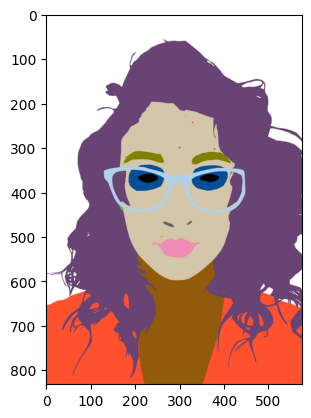

In [8]:
plt.imshow((data['image']*255).numpy().astype(np.uint8).transpose(1, 2, 0))


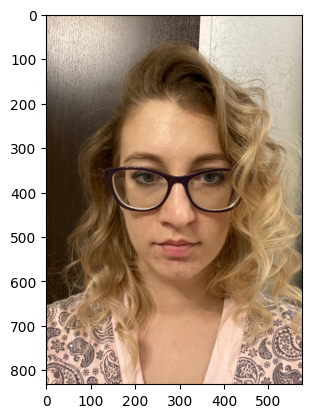

In [9]:
plt.imshow((data['control']*255).numpy().astype(np.uint8).transpose(1, 2, 0))


In [10]:
data['cached']

False

In [11]:
data['prompt']

'change the image from the face to the face segmentation mask'

In [13]:
dataloader = loader(
        class_path=config.data.class_path,
        init_args=config.data.init_args,
        batch_size=config.data.batch_size,
        num_workers=config.data.num_workers,
        shuffle=config.data.shuffle
    )

缓存已启用，缓存目录: /tmp/image_edit_lora/cache


In [14]:
for batch in dataloader:
    break

In [15]:
batch['image'].shape, batch['control'].shape, batch['prompt']


(torch.Size([8, 3, 832, 576]),
 torch.Size([8, 3, 832, 576]),
 ['change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask'])

In [16]:
batch['file_hashes']

{'image_hash': ['e9c716b85125fc46',
  'b48fc38f3cb062a3',
  'adf052cbdc6e2072',
  'bdb0d2cf8b3c8c50',
  'bdad70b6b0703c92',
  'f09e439cc638a753',
  'abd8e3858f6cb490',
  'bdd0c2cd0fae302b'],
 'control_hash': ['e9e69eb8612d6446',
  '98a4a3cb5c2c726f',
  'fdd2028fb22e2953',
  'bd80c22fd22cd9f8',
  'bfed3c32607ca403',
  'cf6bb0418b464cb7',
  'eef8732586267494',
  '9df250cf0e3c303b'],
 'prompt_hash': ['0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5',
  '0115e5112de481e4a8f7b25dfabc29d5'],
 'empty_prompt_hash': ['a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e4822a98337283e39f7b60acf85ec9',
  'a2e482

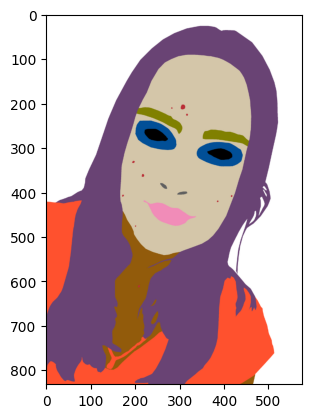

In [29]:
image = batch['image'][6]
image = image.numpy().transpose(1, 2, 0)
image = image*255
image = image.astype(np.uint8)
image.shape
plt.imshow(image)
plt.show()


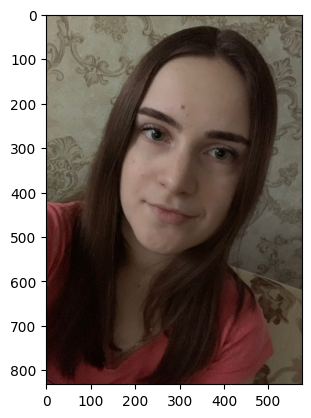

In [30]:
image = batch['control'][6]
image = image.numpy().transpose(1, 2, 0)
image = image*255
image = image.astype(np.uint8)
image.shape
plt.imshow(image)
plt.show()

In [4]:
config_file='../../configs/ktp_flux_kontext_fp16.yaml'
config_file = os.path.abspath(config_file)
config = load_config_from_yaml(config_file)

In [5]:
config

Config(trainer=<TrainerKind.FluxKontext: 'FluxKontext'>, resume=None, mode=<TrMode.predict: 'predict'>, model=ModelConfig(pretrained_model_name_or_path='black-forest-labs/FLUX.1-Kontext-dev', lora=LoraConfig(r=16, lora_alpha=16, init_lora_weights='gaussian', target_modules=['to_k', 'to_q', 'to_v', 'to_out.0'], pretrained_weight=None, adapter_name='lora_edit'), quantize=True), data=DataConfig(class_path='src.data.dataset.ImageDataset', init_args=DatasetInitArgs(dataset_path=['/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/', '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/'], caption_dropout_rate=0.1, prompt_image_dropout_rate=0.1, cache_dir='/raid/lilong/data/experiment/FluxKontextKtpLoraFp16/cache', use_cache=True, use_edit_mask=True, selected_control_indexes=[0, 1, 2], prompt_empty_drop_keys=['prompt_embed', 'pooled_prompt_embed'], processor=ImageProcessorConfig(class_path='src.data.preprocess.ImageProcessor', init_args=ImageProcessorInitArgs(process_type='resize', resize_mode='biline

In [6]:
data_init_args = config.data.init_args
dataset = ImageDataset(data_init_args)

缓存已启用，缓存目录: /raid/lilong/data/experiment/FluxKontextKtpLoraFp16/cache
Found images directory: /raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/training_images
Found control directory: /raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/control_images
2025-09-13 23:02:27,241 | INFO | root: found 3800 prompts
2025-09-13 23:02:27,306 | INFO | root: found 3 controls
2025-09-13 23:02:27,307 | INFO | root: found with stem /raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/control_images/OCR_KTP_CHECK-961676d75a3c236f_20190529092024200_8722247246_aug_12_erase_11


matching prompts: 100%|██████████| 3800/3800 [00:00<00:00, 9451.58it/s] 

2025-09-13 23:02:27,712 | INFO | root:  samples[0]: {'image': '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/training_images/OCR_KTP_CHECK-961676d75a3c236f_20190529092024200_8722247246_aug_12_erase_11.png', 'control': ['/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/control_images/OCR_KTP_CHECK-961676d75a3c236f_20190529092024200_8722247246_aug_12_erase_11.png', '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/control_images/OCR_KTP_CHECK-961676d75a3c236f_20190529092024200_8722247246_aug_12_erase_11_1.png', '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/control_images/OCR_KTP_CHECK-961676d75a3c236f_20190529092024200_8722247246_aug_12_erase_11_2.png', '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/control_images/OCR_KTP_CHECK-961676d75a3c236f_20190529092024200_8722247246_aug_12_erase_11_3.png'], 'caption': '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1/training_images/OCR_KTP_CHECK-961676d75a3c236f_20190529092024200_8722247246_aug_12_erase_11.txt', 'mask_file': '/raid/lilong/data/kyc_gen/ktp_v1.5/datas

Found images directory: /raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/training_images
Found control directory: /raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/control_images
2025-09-13 23:02:27,859 | INFO | root: found 3788 prompts
2025-09-13 23:02:27,929 | INFO | root: found 3 controls
2025-09-13 23:02:27,929 | INFO | root: found with stem /raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/control_images/OCR_KTP_CHECK-23812c6ae1b5d836_20190529081757455_2752472103_aug_3_erase_17_crop


matching prompts: 100%|██████████| 3788/3788 [00:00<00:00, 10110.76it/s]

2025-09-13 23:02:28,306 | INFO | root:  samples[0]: {'image': '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/training_images/OCR_KTP_CHECK-23812c6ae1b5d836_20190529081757455_2752472103_aug_3_erase_17_crop.png', 'control': ['/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/control_images/OCR_KTP_CHECK-23812c6ae1b5d836_20190529081757455_2752472103_aug_3_erase_17_crop.png', '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/control_images/OCR_KTP_CHECK-23812c6ae1b5d836_20190529081757455_2752472103_aug_3_erase_17_crop_1.png', '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/control_images/OCR_KTP_CHECK-23812c6ae1b5d836_20190529081757455_2752472103_aug_3_erase_17_crop_2.png', '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/control_images/OCR_KTP_CHECK-23812c6ae1b5d836_20190529081757455_2752472103_aug_3_erase_17_crop_3.png'], 'caption': '/raid/lilong/data/kyc_gen/ktp_v1.5/dataset1_crop/training_images/OCR_KTP_CHECK-23812c6ae1b5d836_20190529081757455_2752472103_aug_3_erase_17_crop.txt', 

In [7]:
data = dataset[34]

In [8]:
data.keys()

dict_keys(['image', 'control', 'controls', 'mask', 'prompt', 'file_hashes', 'cached'])

In [9]:
data['cached']

False

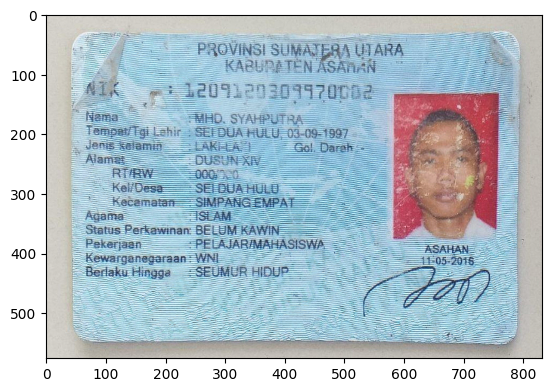

In [10]:
plt.imshow((data['image']*255).numpy().astype(np.uint8).transpose(1, 2, 0))


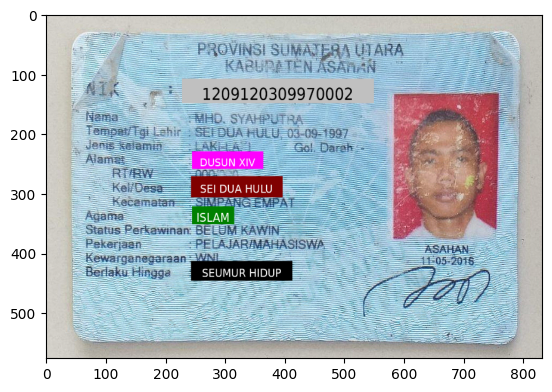

In [11]:
plt.imshow((data['control']*255).numpy().astype(np.uint8).transpose(1, 2, 0))


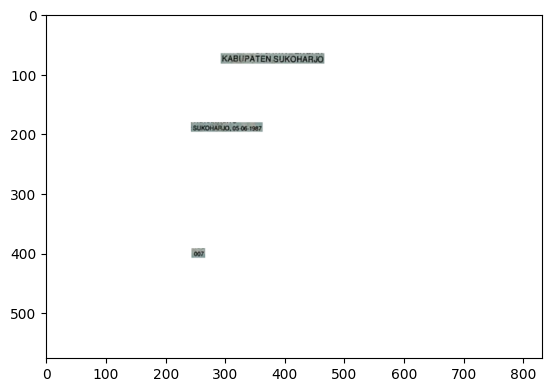

In [12]:
plt.imshow((data['controls'][0]*255).numpy().astype(np.uint8).transpose(1, 2, 0))


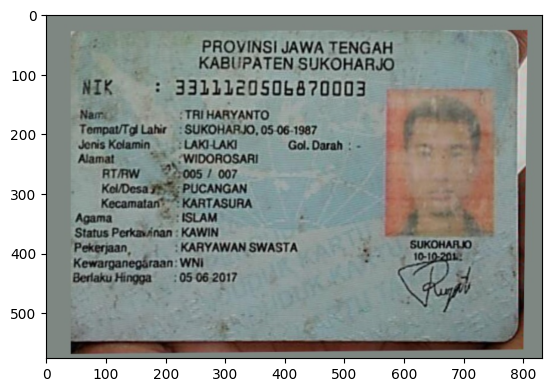

In [13]:
plt.imshow((data['controls'][1]*255).numpy().astype(np.uint8).transpose(1, 2, 0))


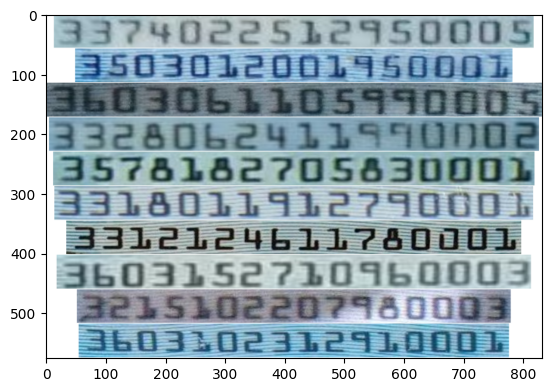

In [16]:
plt.imshow((data['controls'][2]*255).numpy().astype(np.uint8).transpose(1, 2, 0))


In [17]:
data['prompt']

'Replace the colored blocks to corresponding text as indicated in the following json data for realistic text rendering.\nFor each block, render text using the font style indicated by the `style_token`.\n--- BEGIN JSON ---\n{\n  "blocks": [\n    {\n      "idx": "NIK",\n      "field_id": "nik",\n      "style_token": "<f_nik>",\n      "color": "silver",\n      "text": "1209120309970002",\n      "chars": ["1","2","0","9","1","2","0","3","0","9","9","7","0","0","0","2"],\n      "lang": "Indonesian"\n    },\n    {\n      "idx": "ADDRESS",\n      "field_id": "address",\n      "style_token": "<f_address>",\n      "color": "magenta",\n      "text": "DUSUN XIV",\n      "chars": ["D","U","S","U","N","","X","I","V"],\n      "lang": "Indonesian"\n    },\n    {\n      "idx": "RELIGION",\n      "field_id": "religion",\n      "style_token": "<f_religion>",\n      "color": "green",\n      "text": "ISLAM",\n      "chars": ["I","S","L","A","M"],\n      "lang": "Indonesian"\n    },\n    {\n      "idx": "V

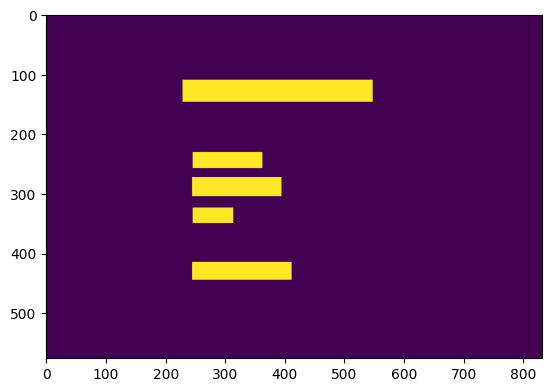

In [ ]:
plt.imshow((data['mask'].numpy().astype(np.uint8)))


In [20]:
data['mask'].shape

torch.Size([576, 832])

In [21]:
data['cached']

False

In [22]:
data['file_hashes']

{'image_hash': 'b8a596a7c615a8a44f0d19ce18df56c0aab0d1e80ec4874ef1a1f432f4a04674',
 'control_hash': 'd95787ada3c7bb9202b9c6890b9be8598daef787c827099d01c574f6b76b39df',
 'prompt_hash': '0234631d84a10082b22a19179fce1bc8',
 'empty_prompt_hash': 'a2e4822a98337283e39f7b60acf85ec9',
 'control_prompt_hash': 'd95787ada3c7bb9202b9c6890b9be8598daef787c827099d01c574f6b76b39df0234631d84a10082b22a19179fce1bc8',
 'control_empty_prompt_hash': 'd95787ada3c7bb9202b9c6890b9be8598daef787c827099d01c574f6b76b39dfa2e4822a98337283e39f7b60acf85ec9',
 'control_1_hash': 'eb5898c745f40c02f5fff45e61d2aa3fbf3f2bd7d574b9611e8304be7fb9e0df',
 'control_2_hash': 'e0313c97fffe4d27688f2c52f04edcbdd2880192dc3369a6caf9a33ebe4792e5',
 'control_3_hash': 'cc833bb2efedacc53316cd0a340a3f3f04164213479a02e4403d6a7dce2b80a3',
 'controls_sum_hash': 'd95787ada3c7bb9202b9c6890b9be8598daef787c827099d01c574f6b76b39dfeb5898c745f40c02f5fff45e61d2aa3fbf3f2bd7d574b9611e8304be7fb9e0dfe0313c97fffe4d27688f2c52f04edcbdd2880192dc3369a6caf9a33e

# cached dataset

In [4]:
config_file='../../tests/test_configs/test_example_fluxkontext_fp4.yaml'
config = load_config_from_yaml(config_file)

In [5]:
config.use_cache

True

In [6]:
config

Config(trainer=<TrainerKind.FluxKontext: 'FluxKontext'>, resume=None, mode=<TrMode.predict: 'predict'>, model=ModelConfig(pretrained_model_name_or_path='eramth/flux-kontext-4bit-fp4', lora=LoraConfig(r=16, lora_alpha=16, init_lora_weights='gaussian', target_modules=['to_k', 'to_q', 'to_v', 'to_out.0'], pretrained_weight=None, adapter_name='lora_edit'), quantize=False), data=DataConfig(class_path='src.data.dataset.ImageDataset', init_args=DatasetInitArgs(dataset_path=[{'split': 'train', 'repo_id': 'TsienDragon/face_segmentation_20'}], caption_dropout_rate=0.1, prompt_image_dropout_rate=0.1, cache_dir='/tmp/image_edit_lora/cache', use_cache=True, use_edit_mask=True, selected_control_indexes=[1], prompt_empty_drop_keys=['prompt_embed', 'pooled_prompt_embed'], processor=ImageProcessorConfig(class_path='src.data.preprocess.ImageProcessor', init_args=ImageProcessorInitArgs(process_type='center_crop', resize_mode='bilinear', target_size=[832, 576], controls_size=[[832, 576]]))), batch_size=8,

In [7]:
dataloader = loader(
        class_path=config.data.class_path,
        init_args=config.data.init_args,
        batch_size=config.data.batch_size,
        num_workers=config.data.num_workers,
        shuffle=config.data.shuffle
    )

缓存已启用，缓存目录: /tmp/image_edit_lora/cache
2025-09-14 00:48:37,286 | INFO | root: Loaded Hugging Face dataset: TsienDragon/face_segmentation_20, {'type': 'huggingface', 'repo_id': 'TsienDragon/face_segmentation_20', 'dataset': Dataset({
    features: ['id', 'control_images', 'control_mask', 'target_image', 'prompt'],
    num_rows: 20
}), 'length': 20, 'start_idx': 0}
2025-09-14 00:48:37,290 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]


In [8]:
for batch in dataloader:
    break
batch['image'].shape, batch['control'].shape, batch['prompt']

(torch.Size([8, 3, 832, 576]),
 torch.Size([8, 3, 832, 576]),
 ['change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask',
  'change the image from the face to the face segmentation mask'])

In [10]:
batch.keys()

dict_keys(['image', 'control', 'prompt', 'file_hashes', 'cached', 'image_latents', 'control_latents', 'pooled_prompt_embed', 'prompt_embed', 'control_ids', 'text_ids', 'image_ids'])

In [11]:
batch['image'].shape

torch.Size([8, 3, 832, 576])

In [12]:
batch['image_latents'].shape

torch.Size([8, 1, 1872, 64])

In [13]:
batch['control_latents'].shape

torch.Size([8, 1, 1872, 64])

In [15]:
batch['prompt_embed'].shape

torch.Size([8, 1, 512, 4096])

In [17]:
batch['text_ids'].shape

torch.Size([8, 512, 3])

In [18]:
batch['image_ids'][0]

tensor([[ 1.,  0.,  0.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  2.],
        ...,
        [ 1., 51., 33.],
        [ 1., 51., 34.],
        [ 1., 51., 35.]], dtype=torch.float16)

In [19]:
batch['control_ids'][0]

tensor([[ 1.,  0.,  0.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  2.],
        ...,
        [ 1., 51., 33.],
        [ 1., 51., 34.],
        [ 1., 51., 35.]], dtype=torch.float16)